## Question -1 ##

## Model

$$
\hat{Y}
= 50
+ 20\,\text{GPA}
+ 0.07\,\text{IQ}
+ 35\,\text{Gender}
+ 0.01(\text{GPA}\cdot \text{IQ})
- 10(\text{GPA}\cdot \text{Gender})
$$

Gender = 1 (Female), 0 (Male)

---

## 1. Male vs Female Comparison

### Male (Gender = 0)

$$
\hat{Y}_M
= 50 + 20\,\text{GPA} + 0.07\,\text{IQ}
+ 0.01(\text{GPA}\cdot \text{IQ})
$$

### Female (Gender = 1)

$$
\hat{Y}_F
= 50 + 20\,\text{GPA} + 0.07\,\text{IQ}
+ 35 + 0.01(\text{GPA}\cdot \text{IQ})
- 10\,\text{GPA}
$$

### Difference

$$
\hat{Y}_F - \hat{Y}_M = 35 - 10\,\text{GPA}
$$

Solve:

$$
35 - 10\,\text{GPA} = 0
\Rightarrow \text{GPA} = 3.5
$$

- GPA < 3.5 → Females earn more  
- GPA > 3.5 → Males earn more  

**Correct option: (c)**

---

## 2. Salary Prediction

Female, IQ = 110, GPA = 4.0

$$
\begin{aligned}
\hat{Y}
&= 50 + 20(4) + 0.07(110) + 35 \\
&\quad + 0.01(4\cdot110) - 10(4) \\
&= 50 + 80 + 7.7 + 35 + 4.4 - 40 \\
&= 137.1
\end{aligned}
$$

$$
\boxed{137.1 \text{ thousand dollars}}
$$

---

## 3. Interaction Term

**False**

Coefficient magnitude alone does not indicate evidence of interaction.  
Statistical evidence depends on standard error and hypothesis testing.


## Question-2 ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence


In [2]:
auto = sm.datasets.get_rdataset("Auto", "ISLR").data
auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
rownames,,,,,,,,,
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df = auto[['mpg', 'horsepower']].dropna()

X = df['horsepower']
y = df['mpg']


In [6]:
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 31 Dec 2025   Prob (F-statistic):           7.03e-81
Time:                        15:48:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
hp_value = pd.DataFrame({'const': [1], 'horsepower': [98]})

prediction = results.get_prediction(hp_value)
prediction.summary_frame(alpha=0.05)
#mean_ci_lower, mean_ci_upper → confidence interval
#obs_ci_lower, obs_ci_upper → prediction interval

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


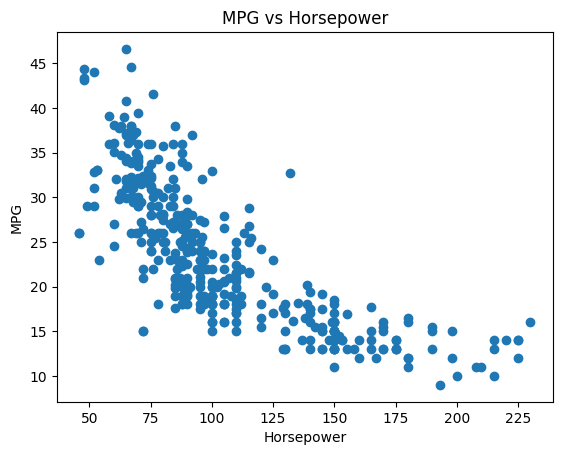

In [8]:
plt.figure()
plt.scatter(X, y)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower")
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_22732\3681611548.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_vals = results.params[0] + results.params[1] * x_vals


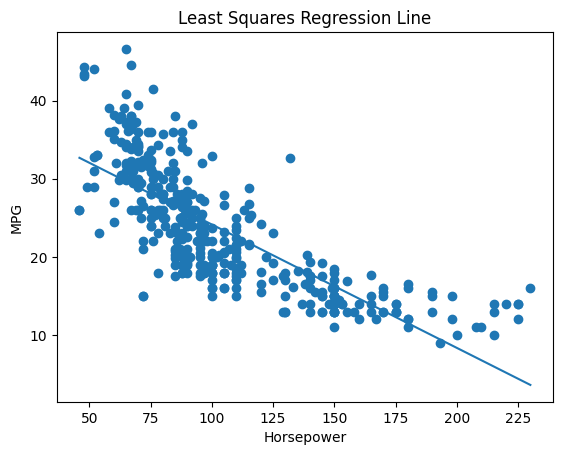

In [9]:
plt.figure()
plt.scatter(X, y)

x_vals = np.linspace(X.min(), X.max(), 100)
y_vals = results.params[0] + results.params[1] * x_vals

plt.plot(x_vals, y_vals)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Least Squares Regression Line")
plt.show()


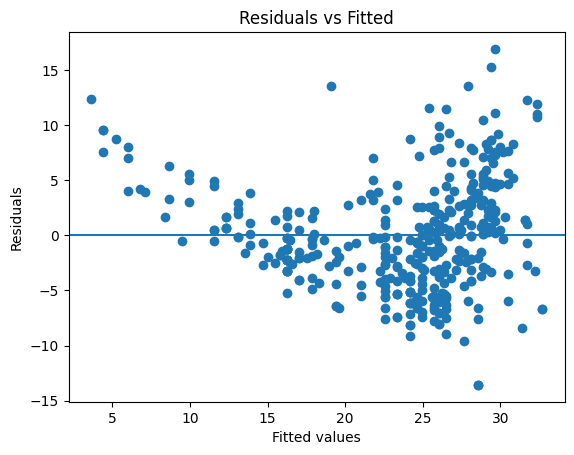

In [10]:
fitted_vals = results.fittedvalues
residuals = results.resid

plt.figure()
plt.scatter(fitted_vals, residuals)
plt.axhline(0)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


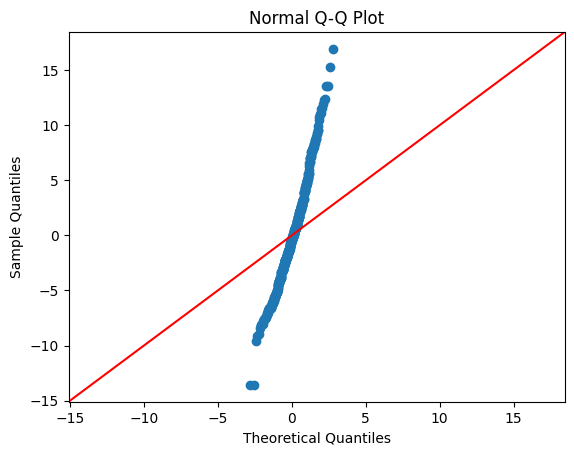

In [11]:
sm.qqplot(residuals, line='45')
plt.title("Normal Q-Q Plot")
plt.show()


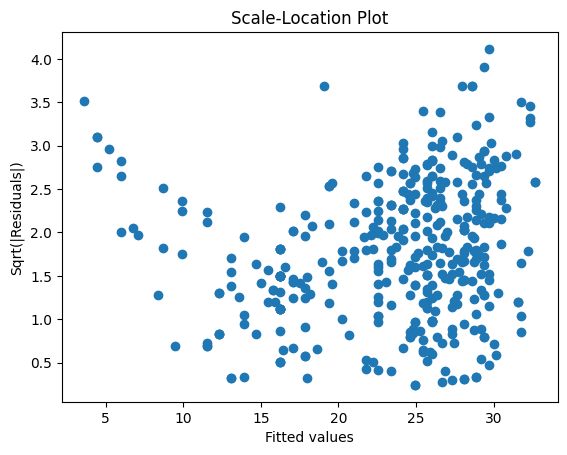

In [12]:
plt.figure()
plt.scatter(fitted_vals, np.sqrt(np.abs(residuals)))
plt.xlabel("Fitted values")
plt.ylabel("Sqrt(|Residuals|)")
plt.title("Scale-Location Plot")
plt.show()


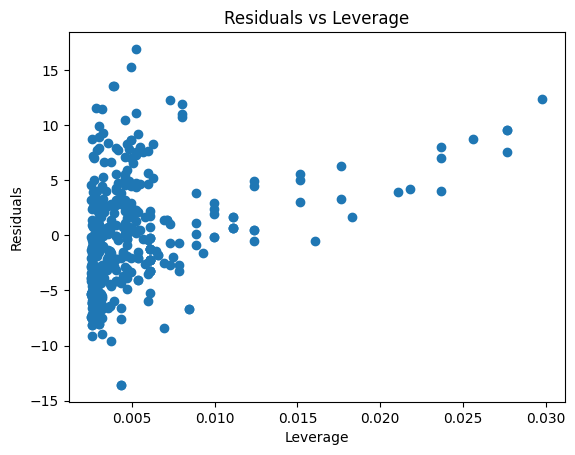

In [13]:
influence = OLSInfluence(results)
leverage = influence.hat_matrix_diag

plt.figure()
plt.scatter(leverage, residuals)
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.title("Residuals vs Leverage")
plt.show()


Clearly the relationship between mpg and horsepower is not linear, which can be seen from the various plots.

## Question-3 ##

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


The data is not directly given for USD.CAD so we find it using AUD.USD and AUD.CAD

In [28]:
audcad = pd.read_csv("Data\inputData_AUDCAD_20120426.csv")
audusd = pd.read_csv("Data\inputData_AUDUSD_20120426.csv")

audusd['Date'] = pd.to_datetime(audusd['Date'], format='%Y%m%d')
audcad['Date'] = pd.to_datetime(audcad['Date'], format='%Y%m%d')

audusd = audusd[['Date', 'Close']]
audcad = audcad[['Date', 'Close']]

merged = pd.merge(
    audusd,
    audcad,
    on='Date',
    how='inner',
    suffixes=('_AUDUSD', '_AUDCAD')
)

#USDCAD = AUDCAD / AUDUSD
merged['USDCAD'] = merged['Close_AUDCAD'] / merged['Close_AUDUSD']

merged = merged.sort_values('Date').reset_index(drop=True)


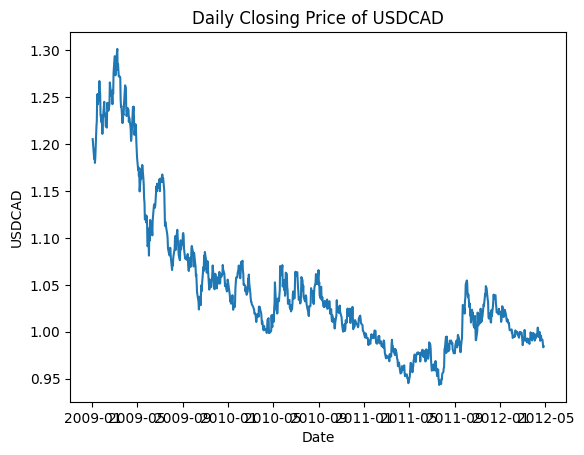

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(merged['Date'], merged['USDCAD'])
plt.xlabel("Date")
plt.ylabel("USDCAD")
plt.title("Daily Closing Price of USDCAD")
plt.show()

Clearly, the mean is changing (mainly decreases) and even the variance is varying widely. This is clearly not a stationary series.

In [23]:
prices = merged['USDCAD']
log_prices = np.log(prices)

adf_result = adfuller(log_prices, maxlag=1)

adf_stat = adf_result[0]
p_value = adf_result[1]
crit_90 = adf_result[4]['10%']

adf_stat, p_value, crit_90

(-1.863207785574971, 0.34956224912557265, -2.5685626352082207)

In [24]:
delta_y = log_prices.diff().dropna()
y_lag = log_prices.shift(1).dropna()

delta_y = delta_y.loc[y_lag.index]


In [27]:
X = sm.add_constant(y_lag)
model = sm.OLS(delta_y, X)
results = model.fit()

lambda_hat = results.params[y_lag.name]
half_life = -np.log(2) / lambda_hat
half_life

94.36967596122346

The ADF test on the log-prices of USDCAD (lag = 1) yields a test statistic of −1.86 with a p-value of 0.35, which is higher than the 10% critical value of −2.57. Hence, we fail to reject the null hypothesis of a unit root, indicating that the series is non-stationary. Additionally, the estimated half-life of mean reversion is approximately 94 trading days. Such a long half-life renders the series impractical for short-term mean-reversion trading, even if weak stationarity were assumed.


## Question- 4 ##

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [3]:
ewa_ewc=pd.read_csv("Data\inputData_EWA_EWC.csv")
ewa_ewc['Date'] = pd.to_datetime(ewa_ewc['Date'], format='%Y%m%d')

ewa_ewc = ewa_ewc[['Date', 'EWA', 'EWC']]

ewa_ewc = ewa_ewc.sort_values('Date').reset_index(drop=True)

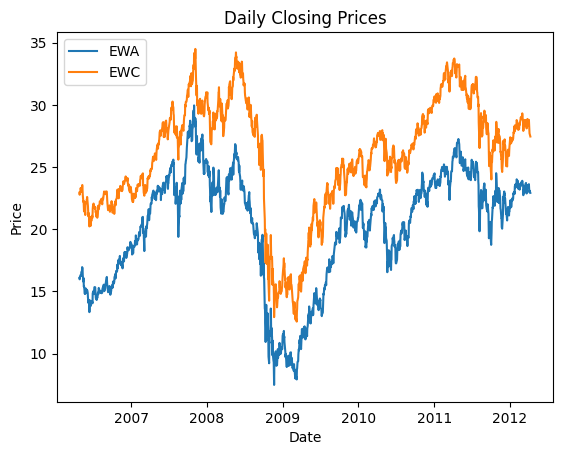

The correlation is 0.9575322660751621


In [4]:
plt.figure()
plt.plot(ewa_ewc['Date'], ewa_ewc['EWA'], label='EWA')
plt.plot(ewa_ewc['Date'], ewa_ewc['EWC'], label='EWC')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Daily Closing Prices")
plt.legend()
plt.show()

correlation = ewa_ewc['EWA'].corr(ewa_ewc['EWC'])
print ("The correlation is",correlation)

In [5]:
X = sm.add_constant(ewa_ewc['EWC'])
model = sm.OLS(ewa_ewc['EWA'], X)
results = model.fit()
beta = results.params.iloc[1]
print ("The Hedge Ratio is",beta)

The Hedge Ratio is 0.9526600515607516


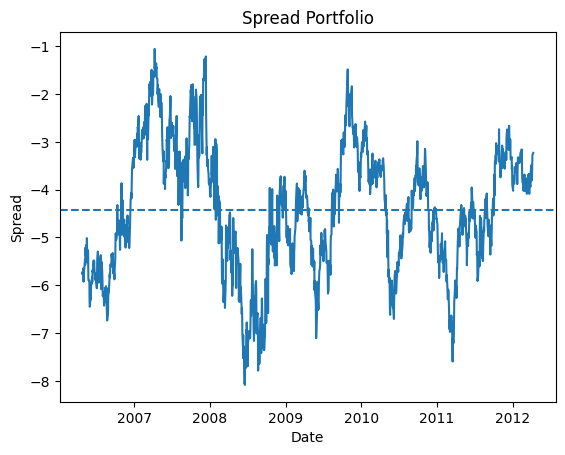

In [6]:
spread = ewa_ewc['EWA'] - beta * ewa_ewc['EWC']

plt.figure()
plt.plot(ewa_ewc['Date'], spread)
plt.axhline(spread.mean(), linestyle='--')
plt.xlabel("Date")
plt.ylabel("Spread")
plt.title("Spread Portfolio")
plt.show()


The spread plot clearly varies and oscillates way too much and can stay above or below the mean for years. This clearly suggests violation of mean reversion.

In [7]:
adf_result = adfuller(spread, maxlag=1, regression='n')

adf_stat = adf_result[0]
p_value = adf_result[1]
crit_95 = adf_result[4]['5%']

adf_stat, p_value, crit_95

(-1.2909908010672468, 0.18156193385260683, -1.941180796004319)

Since −1.291 > −1.941, we fail to reject the null hypothesis at the 95% confidence level. 
The spread is not stationary, hence the pair is not cointegrated.

In [8]:
spread_lag = spread.shift(1).dropna()
delta_spread = spread.diff().dropna()

delta_spread = delta_spread.loc[spread_lag.index]

X = sm.add_constant(spread_lag)
model = sm.OLS(delta_spread, X)
results = model.fit()

lambda_hat = results.params.iloc[1]
half_life = -np.log(2) / lambda_hat
half_life

27.950908844154135